In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
cleaned_dataset = pd.read_csv('../data/feature-engineered/feature_engineered_youtube_data.csv')
cleaned_dataset

,video_id,category_id,country,tags,definition,channel_id,channel_title,logged_at_initial,view_count_initial,like_count_initial,...,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,__1VyK2eQp8,22.0,unknown,unknown,hd,UCQHNLiqOCSiHgiLnIqADqCw,동그람이,2025-08-01 15:01:29,53.0,3.0,...,26.0,669.207479,30.738239,9.341456,64.940268,606.636683,87.262807,9.341456,1104.708651,0.294328
1,__2_hnYMSsw,22.0,unknown,unknown,hd,UCy3LY7AfHxsmbbR7-26UDTQ,JamiesVlog2.0,2025-08-03 07:01:27,3.0,2.0,...,0.0,669.207479,30.738239,4.882802,111.742424,545.616124,23.841755,4.882802,22.008110,0.153846
2,__2dhBs4XIA,20.0,unknown,unknown,hd,UCLUuwHvQpsufGf6MJcrHpKA,INDIAN JK GAMER,2025-08-05 03:01:27,19.0,0.0,...,0.0,7741.158727,60.068160,9.674137,207.788315,2010.172686,93.588932,9.674137,426.759786,0.158415
3,__2mImszS_8,27.0,GB,unknown,hd,UCTa4-LmkT71W167cmkj-grA,Craig Miles,2025-08-02 02:01:32,2.0,0.0,...,0.0,533.657254,14.704479,5.662960,366.295139,2074.314896,32.069121,5.662960,197.309583,0.360595
4,__3IzcDWTZ8,24.0,unknown,unknown,hd,UCTbweMHZw2Z9uCe-OJQ9CXw,Reshal Dmello,2025-08-03 04:01:29,1.0,0.0,...,0.0,2610.078613,80.845175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52539,nZLw7sxiqrQ,22.0,US,"HFY,HFY Story,HFY Short Story,HFY War,Science ...",hd,UClG9_zRMLYaZPaeZluS2jYA,Solvatica HFY,2025-08-08 05:01:50,0.0,0.0,...,0.0,669.207479,30.738239,0.000000,8.000000,0.000000,0.000000,0.000000,0.011937,0.000000
52540,nzmaoZRNy2E,22.0,unknown,unknown,hd,UCRvaivsZhDg7EIFiljVRmWA,Zata Hada Tv,2025-08-03 02:01:47,1.0,1.0,...,0.0,669.207479,30.738239,6.620073,126.674667,838.595567,43.825369,6.620073,141.756102,0.208584
52541,nZMn3kqmuaY,25.0,US,"#Shorts,#TrumpTariffs,#IndiaTariffs,#RussianOi...",hd,UCz21JMGwOq90NpSs-hADTgg,Just Some News,2025-08-08 04:01:44,145.0,2.0,...,0.0,677.583791,28.894892,5.549076,1803.385214,10007.121763,30.792245,5.549076,682.995978,0.185620
52542,NZmwihLPxkg,22.0,unknown,unknown,hd,UCXCdNr3oN_nX_hBnusaBMDQ,Team Hozzy,2025-08-03 03:01:44,473.0,22.0,...,13.0,669.207479,30.738239,9.187174,349.063248,3206.904833,84.404168,9.187174,5089.016622,0.289467


In [3]:
cleaned_dataset.columns

Index(['video_id', 'category_id', 'country', 'tags', 'definition',
       'channel_id', 'channel_title', 'logged_at_initial',
       'view_count_initial', 'like_count_initial', 'comment_count_initial',
       'c_view_count_initial', 'c_subscriber_count_initial', 'logged_at_final',
       'view_count_final', 'like_count_final', 'comment_count_final',
       'c_view_count_final', 'c_subscriber_count_final', 'published_year',
       'published_month', 'published_day_of_week', 'published_time',
       'view_count_difference', 'like_count_difference',
       'avg_view_diff_per_category', 'avg_likes_diff_per_category',
       'channel_authority', 'channel_avg_views', 'channel_growth_potential',
       'channel_virality_score', 'log_channel_subs',
       'relative_views_to_category', 'relative_likes_to_category'],
      dtype='object')

In [4]:
cleaned_dataset = cleaned_dataset.drop(
    ['video_id', 'tags', 'channel_id', 'channel_title', 'comment_count_initial',
     'c_subscriber_count_initial', 'c_view_count_final', 'c_subscriber_count_final',
     'view_count_difference','like_count_difference','comment_count_final'], 
    axis=1,
    errors='ignore'  # This avoids crashing if a column is missing
)


In [5]:
cleaned_dataset.columns

Index(['category_id', 'country', 'definition', 'logged_at_initial',
       'view_count_initial', 'like_count_initial', 'c_view_count_initial',
       'logged_at_final', 'view_count_final', 'like_count_final',
       'published_year', 'published_month', 'published_day_of_week',
       'published_time', 'avg_view_diff_per_category',
       'avg_likes_diff_per_category', 'channel_authority', 'channel_avg_views',
       'channel_growth_potential', 'channel_virality_score',
       'log_channel_subs', 'relative_views_to_category',
       'relative_likes_to_category'],
      dtype='object')

In [6]:
cleaned_dataset.dtypes

category_id                    float64
country                         object
definition                      object
logged_at_initial               object
view_count_initial             float64
like_count_initial             float64
c_view_count_initial           float64
logged_at_final                 object
view_count_final               float64
like_count_final               float64
published_year                   int64
published_month                  int64
published_day_of_week           object
published_time                  object
avg_view_diff_per_category     float64
avg_likes_diff_per_category    float64
channel_authority              float64
channel_avg_views              float64
channel_growth_potential       float64
channel_virality_score         float64
log_channel_subs               float64
relative_views_to_category     float64
relative_likes_to_category     float64
dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Define target columns to exclude
target_columns = [
    'like_count_initial',
    'like_count_final',
    'view_count_initial',
    'view_count_final'
]

# Define additional columns to exclude from scaling
exclude_columns = target_columns + ['category_id','published_year','published_month',]

# Keep only numeric columns
numeric_cols = cleaned_dataset.select_dtypes(include='number').columns.tolist()

# Determine columns to scale: numeric AND not in exclude list
scale_columns = [col for col in numeric_cols if col not in exclude_columns and col != 'category_id']

# Apply standard scaling only to selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cleaned_dataset[scale_columns])

# Create scaled DataFrame
scaled_df = pd.DataFrame(scaled_values, columns=scale_columns, index=cleaned_dataset.index)

# Combine with unscaled columns
unscaled_df = cleaned_dataset.drop(columns=scale_columns)
final_df = pd.concat([unscaled_df, scaled_df], axis=1)

# Export the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [8]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,published_time,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,14:30:53,669.207479,30.738239,9.341456,64.940268,606.636683,87.262807,9.341456,1104.708651,0.294328
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,06:44:45,669.207479,30.738239,4.882802,111.742424,545.616124,23.841755,4.882802,22.008110,0.153846
2,20.0,unknown,hd,2025-08-05 03:01:27,19.0,0.0,3304042.0,2025-08-05 04:00:05,19.0,0.0,...,02:31:10,7741.158727,60.068160,9.674137,207.788315,2010.172686,93.588932,9.674137,426.759786,0.158415
3,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,02:00:06,533.657254,14.704479,5.662960,366.295139,2074.314896,32.069121,5.662960,197.309583,0.360595
4,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,03:12:48,2610.078613,80.845175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52539,22.0,US,hd,2025-08-08 05:01:50,0.0,0.0,8.0,2025-08-08 06:00:24,0.0,0.0,...,04:15:04,669.207479,30.738239,0.000000,8.000000,0.000000,0.000000,0.000000,0.011937,0.000000
52540,22.0,unknown,hd,2025-08-03 02:01:47,1.0,1.0,95006.0,2025-08-03 03:00:23,1.0,1.0,...,01:40:48,669.207479,30.738239,6.620073,126.674667,838.595567,43.825369,6.620073,141.756102,0.208584
52541,25.0,US,hd,2025-08-08 04:01:44,145.0,2.0,463470.0,2025-08-08 05:00:24,358.0,2.0,...,03:30:59,677.583791,28.894892,5.549076,1803.385214,10007.121763,30.792245,5.549076,682.995978,0.185620
52542,22.0,unknown,hd,2025-08-03 03:01:44,473.0,22.0,3410697.0,2025-08-03 04:00:23,781.0,35.0,...,02:02:29,669.207479,30.738239,9.187174,349.063248,3206.904833,84.404168,9.187174,5089.016622,0.289467


In [9]:
cleaned_dataset.shape

(52544, 23)

In [10]:
correlation_matrix = cleaned_dataset.corr(numeric_only=True).abs()
correlation_matrix

,category_id,view_count_initial,like_count_initial,c_view_count_initial,view_count_final,like_count_final,published_year,published_month,avg_view_diff_per_category,avg_likes_diff_per_category,channel_authority,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
category_id,1.000000,0.001932,0.005833,0.013989,0.001877,0.003046,NaN,0.000886,0.055959,0.094845,0.007707,0.010804,0.020193,0.014755,0.007707,0.002767,0.029777
view_count_initial,0.001932,1.000000,0.656298,0.050821,0.817085,0.612104,NaN,0.001372,0.092710,0.034441,0.119587,0.001374,0.035873,0.141908,0.119587,0.020344,0.035717
like_count_initial,0.005833,0.656298,1.000000,0.165859,0.545460,0.914138,NaN,0.003514,0.074176,0.028591,0.100358,0.004063,0.025835,0.122994,0.100358,0.195674,0.030073
c_view_count_initial,0.013989,0.050821,0.165859,1.000000,0.074007,0.176977,NaN,0.007516,0.001908,0.029187,0.192969,0.036634,0.151391,0.276141,0.192969,0.847761,0.091788
view_count_final,0.001877,0.817085,0.545460,0.074007,1.000000,0.600270,NaN,0.001081,0.115786,0.051125,0.139205,0.000941,0.048073,0.162539,0.139205,0.033293,0.035068
like_count_final,0.003046,0.612104,0.914138,0.176977,0.600270,1.000000,NaN,0.006336,0.069248,0.041260,0.129443,0.004313,0.050845,0.158153,0.129443,0.184553,0.041834
published_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_month,0.000886,0.001372,0.003514,0.007516,0.001081,0.006336,NaN,1.000000,0.003212,0.003066,0.009373,0.001639,0.008703,0.011824,0.009373,0.002612,0.002041
avg_view_diff_per_category,0.055959,0.092710,0.074176,0.001908,0.115786,0.069248,NaN,0.003212,1.000000,0.515577,0.151019,0.039615,0.012705,0.128749,0.151019,0.021079,0.283351
avg_likes_diff_per_category,0.094845,0.034441,0.028591,0.029187,0.051125,0.041260,NaN,0.003066,0.515577,1.000000,0.163377,0.012717,0.032069,0.145126,0.163377,0.009333,0.459600


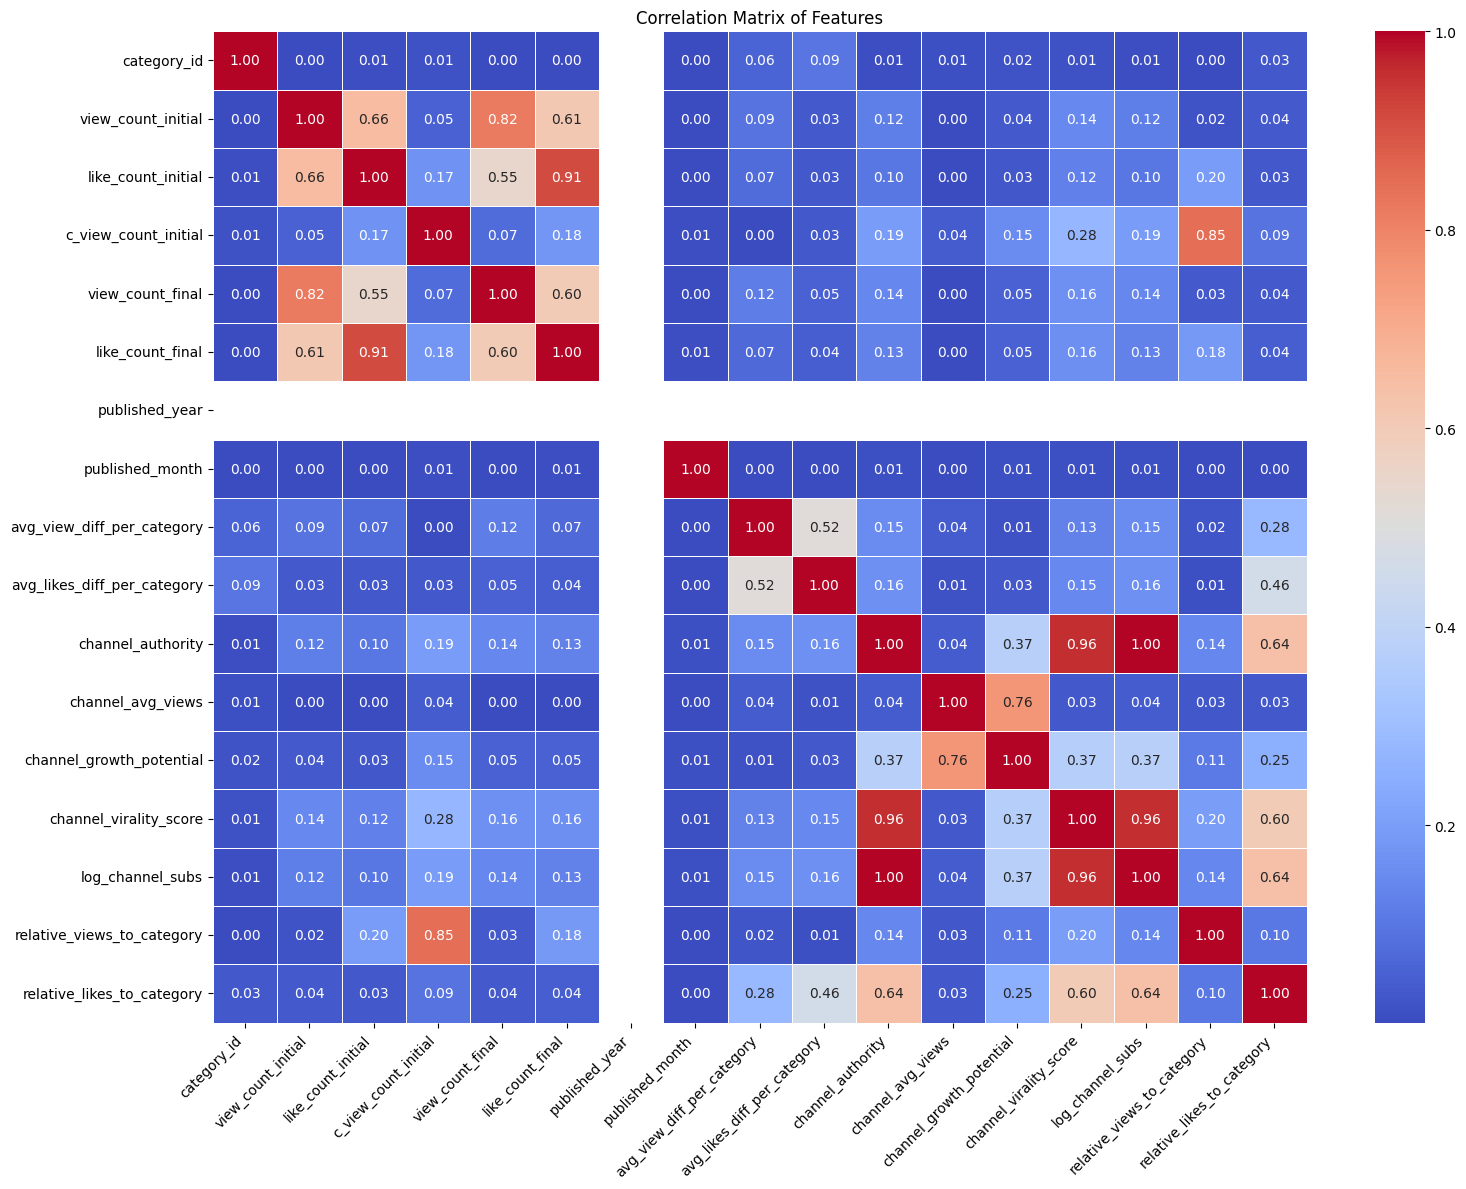

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
# Select upper triangle of correlation matrix to avoid duplicates
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
high_corr_pairs = [
    (column, row, upper_tri.loc[row, column])
    for column in upper_tri.columns
    for row in upper_tri.index
    if upper_tri.loc[row, column] > 0.9
]

# Sort by correlation strength (optional)
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")

log_channel_subs ↔ channel_authority: 1.00
log_channel_subs ↔ channel_virality_score: 0.96
channel_virality_score ↔ channel_authority: 0.96
like_count_final ↔ like_count_initial: 0.91


In [13]:
columns_to_drop = [
   'channel_authority'
]

cleaned_dataset.drop(columns=columns_to_drop, inplace=True)


In [14]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,published_day_of_week,published_time,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,Friday,14:30:53,669.207479,30.738239,64.940268,606.636683,87.262807,9.341456,1104.708651,0.294328
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,Sunday,06:44:45,669.207479,30.738239,111.742424,545.616124,23.841755,4.882802,22.008110,0.153846
2,20.0,unknown,hd,2025-08-05 03:01:27,19.0,0.0,3304042.0,2025-08-05 04:00:05,19.0,0.0,...,Tuesday,02:31:10,7741.158727,60.068160,207.788315,2010.172686,93.588932,9.674137,426.759786,0.158415
3,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,Saturday,02:00:06,533.657254,14.704479,366.295139,2074.314896,32.069121,5.662960,197.309583,0.360595
4,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,Sunday,03:12:48,2610.078613,80.845175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52539,22.0,US,hd,2025-08-08 05:01:50,0.0,0.0,8.0,2025-08-08 06:00:24,0.0,0.0,...,Friday,04:15:04,669.207479,30.738239,8.000000,0.000000,0.000000,0.000000,0.011937,0.000000
52540,22.0,unknown,hd,2025-08-03 02:01:47,1.0,1.0,95006.0,2025-08-03 03:00:23,1.0,1.0,...,Sunday,01:40:48,669.207479,30.738239,126.674667,838.595567,43.825369,6.620073,141.756102,0.208584
52541,25.0,US,hd,2025-08-08 04:01:44,145.0,2.0,463470.0,2025-08-08 05:00:24,358.0,2.0,...,Friday,03:30:59,677.583791,28.894892,1803.385214,10007.121763,30.792245,5.549076,682.995978,0.185620
52542,22.0,unknown,hd,2025-08-03 03:01:44,473.0,22.0,3410697.0,2025-08-03 04:00:23,781.0,35.0,...,Sunday,02:02:29,669.207479,30.738239,349.063248,3206.904833,84.404168,9.187174,5089.016622,0.289467


In [15]:
cleaned_dataset['logged_at_initial_hour'] = pd.to_datetime(cleaned_dataset['logged_at_initial']).dt.hour
cleaned_dataset['logged_at_final_hour'] = pd.to_datetime(cleaned_dataset['logged_at_final']).dt.hour


In [16]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category,logged_at_initial_hour,logged_at_final_hour
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,669.207479,30.738239,64.940268,606.636683,87.262807,9.341456,1104.708651,0.294328,15.0,21.0
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,669.207479,30.738239,111.742424,545.616124,23.841755,4.882802,22.008110,0.153846,7.0,8.0
2,20.0,unknown,hd,2025-08-05 03:01:27,19.0,0.0,3304042.0,2025-08-05 04:00:05,19.0,0.0,...,7741.158727,60.068160,207.788315,2010.172686,93.588932,9.674137,426.759786,0.158415,3.0,4.0
3,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,533.657254,14.704479,366.295139,2074.314896,32.069121,5.662960,197.309583,0.360595,2.0,3.0
4,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,2610.078613,80.845175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52539,22.0,US,hd,2025-08-08 05:01:50,0.0,0.0,8.0,2025-08-08 06:00:24,0.0,0.0,...,669.207479,30.738239,8.000000,0.000000,0.000000,0.000000,0.011937,0.000000,5.0,6.0
52540,22.0,unknown,hd,2025-08-03 02:01:47,1.0,1.0,95006.0,2025-08-03 03:00:23,1.0,1.0,...,669.207479,30.738239,126.674667,838.595567,43.825369,6.620073,141.756102,0.208584,2.0,3.0
52541,25.0,US,hd,2025-08-08 04:01:44,145.0,2.0,463470.0,2025-08-08 05:00:24,358.0,2.0,...,677.583791,28.894892,1803.385214,10007.121763,30.792245,5.549076,682.995978,0.185620,4.0,5.0
52542,22.0,unknown,hd,2025-08-03 03:01:44,473.0,22.0,3410697.0,2025-08-03 04:00:23,781.0,35.0,...,669.207479,30.738239,349.063248,3206.904833,84.404168,9.187174,5089.016622,0.289467,3.0,4.0


In [17]:
cleaned_dataset.dtypes

category_id                    float64
country                         object
definition                      object
logged_at_initial               object
view_count_initial             float64
like_count_initial             float64
c_view_count_initial           float64
logged_at_final                 object
view_count_final               float64
like_count_final               float64
published_year                   int64
published_month                  int64
published_day_of_week           object
published_time                  object
avg_view_diff_per_category     float64
avg_likes_diff_per_category    float64
channel_avg_views              float64
channel_growth_potential       float64
channel_virality_score         float64
log_channel_subs               float64
relative_views_to_category     float64
relative_likes_to_category     float64
logged_at_initial_hour         float64
logged_at_final_hour           float64
dtype: object

In [18]:
cleaned_dataset

,category_id,country,definition,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,logged_at_final,view_count_final,like_count_final,...,avg_view_diff_per_category,avg_likes_diff_per_category,channel_avg_views,channel_growth_potential,channel_virality_score,log_channel_subs,relative_views_to_category,relative_likes_to_category,logged_at_initial_hour,logged_at_final_hour
0,22.0,unknown,hd,2025-08-01 15:01:29,53.0,3.0,740384.0,2025-08-01 21:00:04,505.0,29.0,...,669.207479,30.738239,64.940268,606.636683,87.262807,9.341456,1104.708651,0.294328,15.0,21.0
1,22.0,unknown,hd,2025-08-03 07:01:27,3.0,2.0,14750.0,2025-08-03 08:00:04,3.0,2.0,...,669.207479,30.738239,111.742424,545.616124,23.841755,4.882802,22.008110,0.153846,7.0,8.0
2,20.0,unknown,hd,2025-08-05 03:01:27,19.0,0.0,3304042.0,2025-08-05 04:00:05,19.0,0.0,...,7741.158727,60.068160,207.788315,2010.172686,93.588932,9.674137,426.759786,0.158415,3.0,4.0
3,27.0,GB,hd,2025-08-02 02:01:32,2.0,0.0,105493.0,2025-08-02 03:00:04,2.0,0.0,...,533.657254,14.704479,366.295139,2074.314896,32.069121,5.662960,197.309583,0.360595,2.0,3.0
4,24.0,unknown,hd,2025-08-03 04:01:29,1.0,0.0,0.0,2025-08-03 05:00:04,1.0,0.0,...,2610.078613,80.845175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52539,22.0,US,hd,2025-08-08 05:01:50,0.0,0.0,8.0,2025-08-08 06:00:24,0.0,0.0,...,669.207479,30.738239,8.000000,0.000000,0.000000,0.000000,0.011937,0.000000,5.0,6.0
52540,22.0,unknown,hd,2025-08-03 02:01:47,1.0,1.0,95006.0,2025-08-03 03:00:23,1.0,1.0,...,669.207479,30.738239,126.674667,838.595567,43.825369,6.620073,141.756102,0.208584,2.0,3.0
52541,25.0,US,hd,2025-08-08 04:01:44,145.0,2.0,463470.0,2025-08-08 05:00:24,358.0,2.0,...,677.583791,28.894892,1803.385214,10007.121763,30.792245,5.549076,682.995978,0.185620,4.0,5.0
52542,22.0,unknown,hd,2025-08-03 03:01:44,473.0,22.0,3410697.0,2025-08-03 04:00:23,781.0,35.0,...,669.207479,30.738239,349.063248,3206.904833,84.404168,9.187174,5089.016622,0.289467,3.0,4.0


In [19]:
cleaned_dataset.to_csv('../data/pre-processed/preprocessed_youtube_data.csv', index=False)